In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [2]:
model = load_model('model_keras.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [3]:
test_dir = r'C:\Users\Dhruv Agarwal\Desktop\project\ring'
test_imgs = [r'C:\Users\Dhruv Agarwal\Desktop\project\ring\{}' .format(i) for i in os.listdir(test_dir)]
def read_and_process_image(list_of_images):
    x = []
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (150,150), interpolation=cv2.INTER_CUBIC))
    return x       

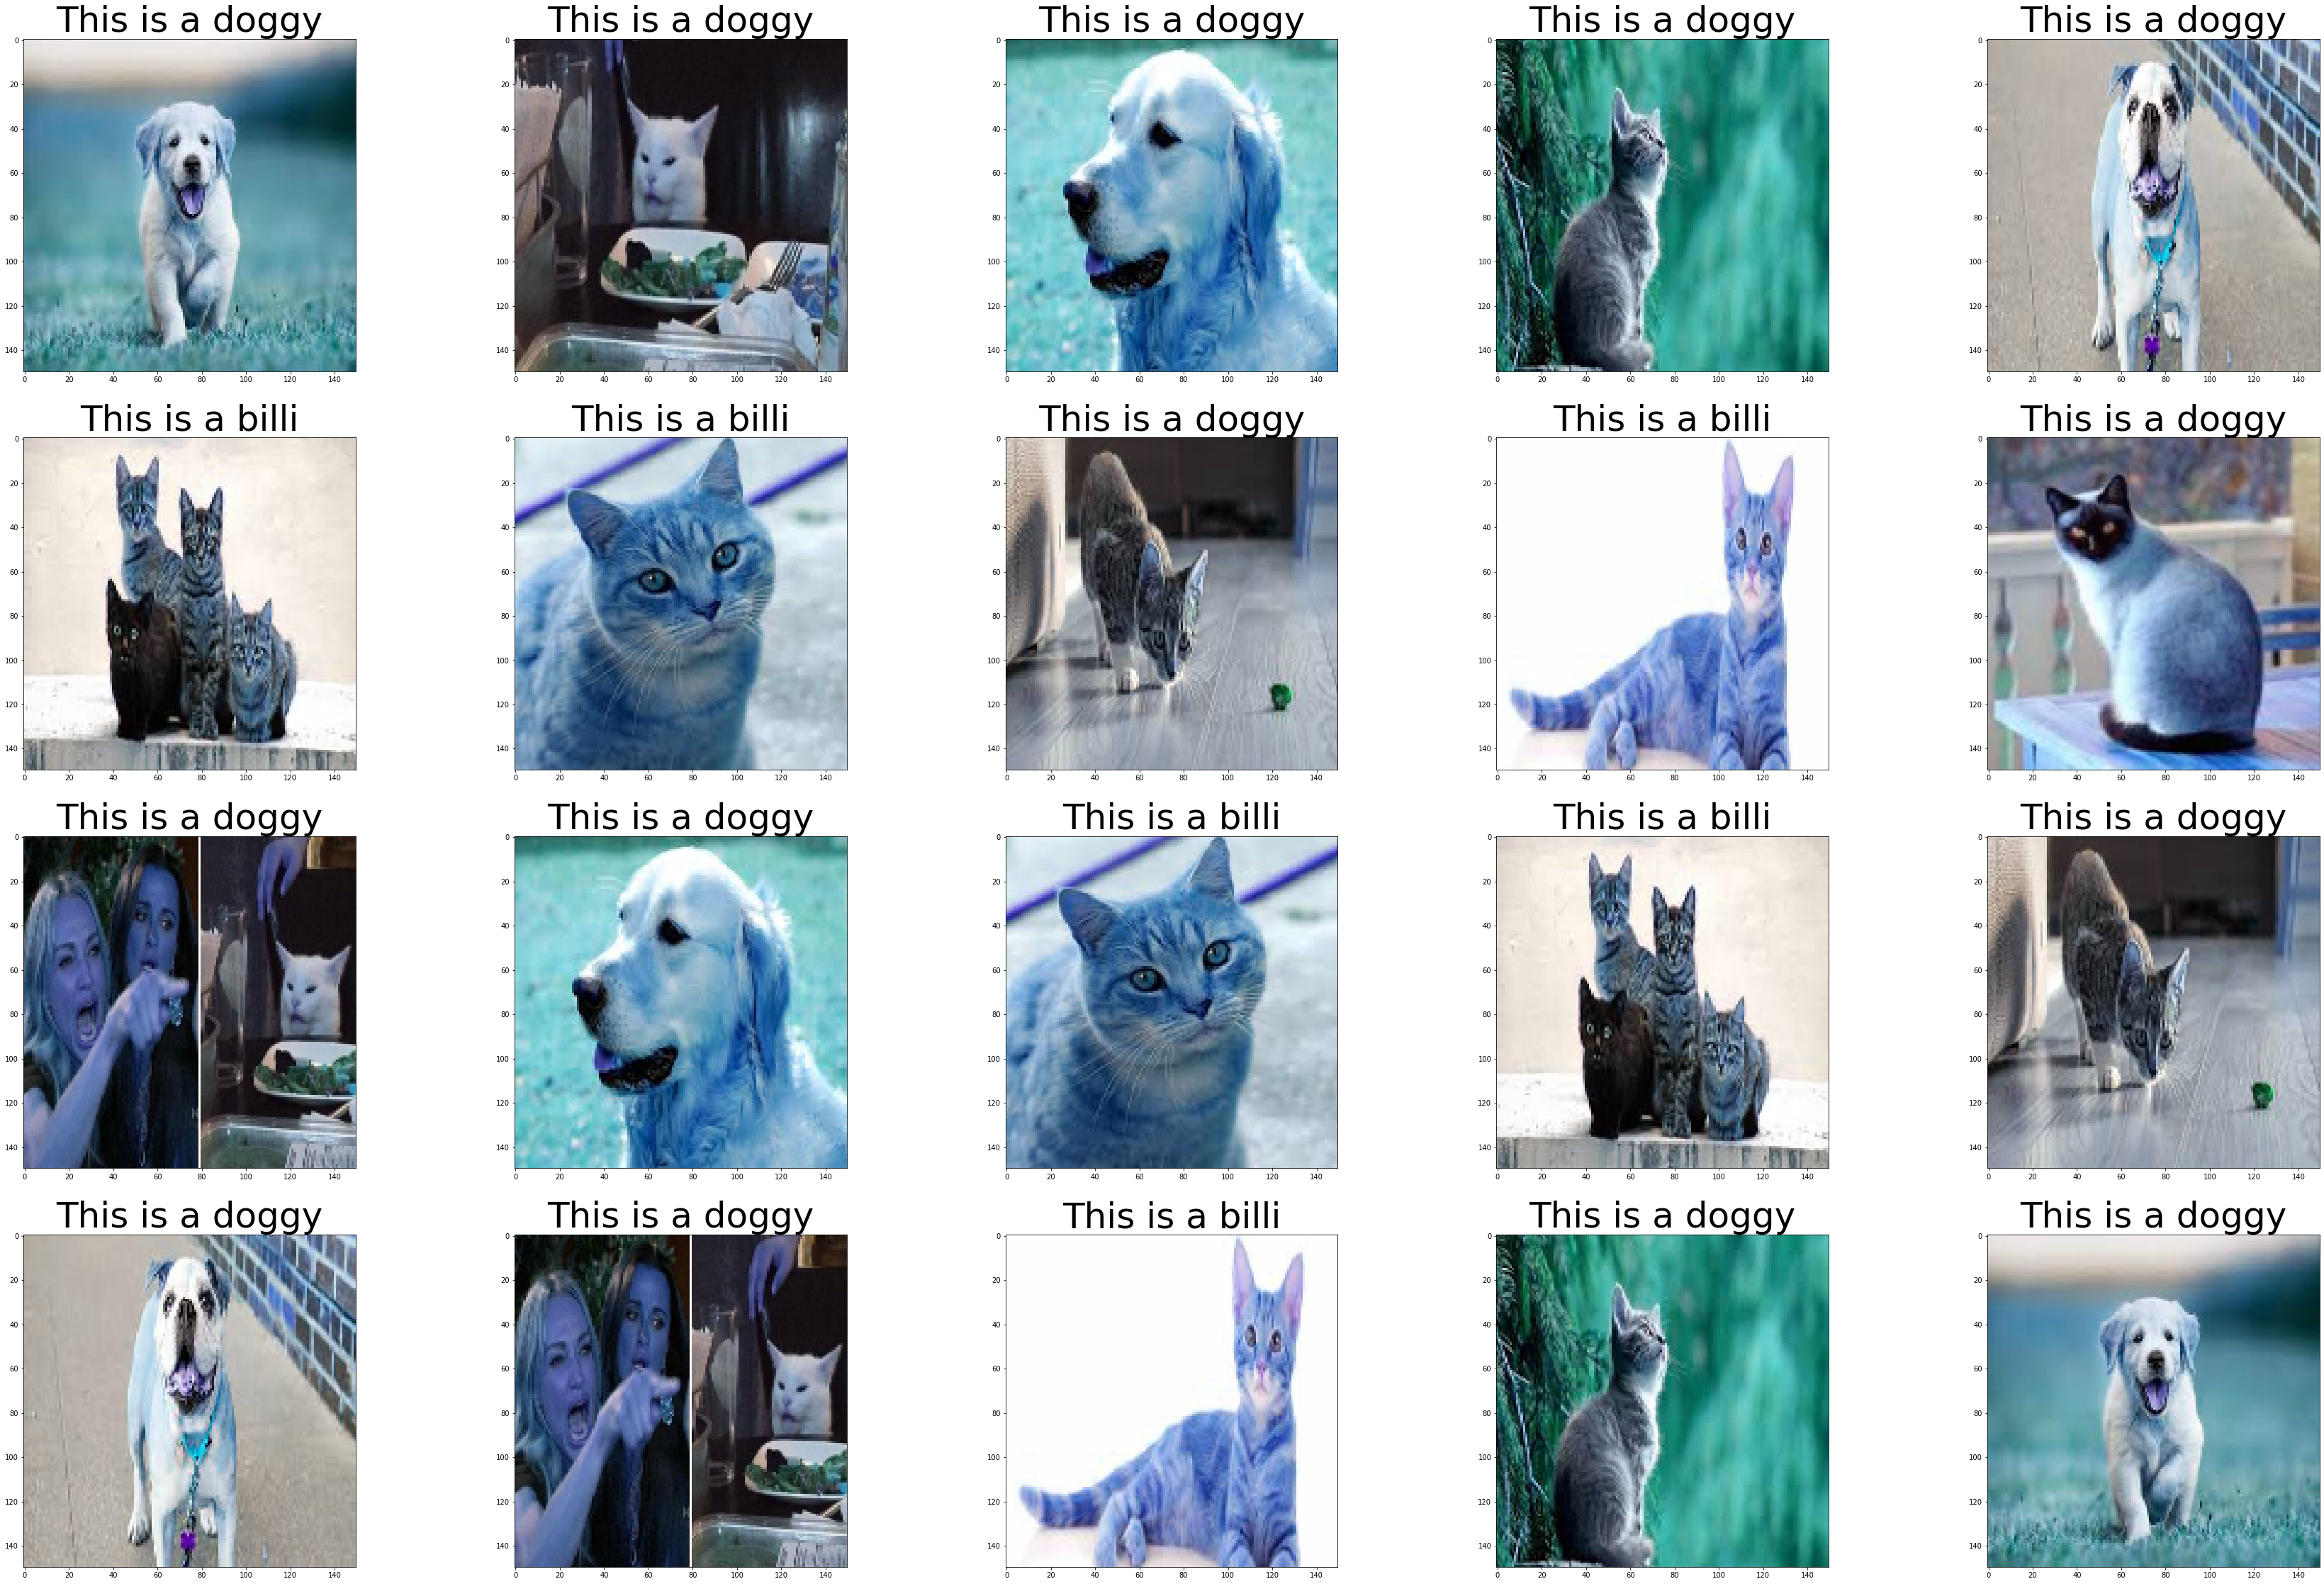

In [4]:
x_test= read_and_process_image(test_imgs[0:11])
x = np.array(x_test)
test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
text_labels=[]
plt.figure(figsize=(60,50))
for batch in test_datagen.flow(x, batch_size=1):
    pred=model.predict(batch)
    if pred > 0.5:
        text_labels.append('doggy')
    else:
        text_labels.append('billi')
    plt.subplot(5,5, i+1)
    plt.title('This is a '+ text_labels[i], fontsize="50")
    imgplot = plt.imshow(batch[0])
    i+=1
    if i%20==0:
        break
plt.show()   